# Importing Libraries and Exploring Data

In [1]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/train.csv')
df.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,0,0005019281,ADZPIG9QOCDG5,0,0,4.0,1203984000,good version of a classic,This is a charming version of the classic Dick...
1,1,0005019281,A35947ZP82G7JH,0,0,3.0,1388361600,Good but not as moving,It was good but not as emotionally moving as t...
2,2,0005019281,A3UORV8A9D5L2E,0,0,3.0,1388361600,Winkler's Performance was ok at best!,"Don't get me wrong, Winkler is a wonderful cha..."
3,3,0005019281,A1VKW06X1O2X7V,0,0,5.0,1202860800,It's an enjoyable twist on the classic story,Henry Winkler is very good in this twist on th...
4,4,0005019281,A3R27T4HADWFFJ,0,0,4.0,1387670400,Best Scrooge yet,This is one of the best Scrooge movies out. H...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697533 entries, 0 to 1697532
Data columns (total 9 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Id                      int64  
 1   ProductId               object 
 2   UserId                  object 
 3   HelpfulnessNumerator    int64  
 4   HelpfulnessDenominator  int64  
 5   Score                   float64
 6   Time                    int64  
 7   Summary                 object 
 8   Text                    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 116.6+ MB


<AxesSubplot:>

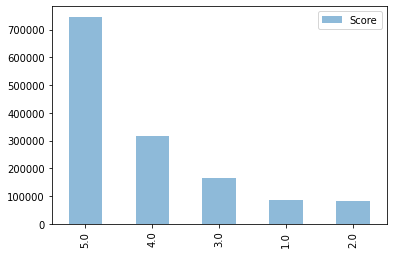

In [4]:
df['Score'].value_counts().plot(kind='bar', legend=True, alpha=.5)

In [5]:
df.dropna(inplace=True)

In [6]:
lenrev = []
for x in df['Text']:
    lenrev.append(len(x))

In [7]:
df['lenrev'] = lenrev

<AxesSubplot:xlabel='Score', ylabel='HelpfulnessNumerator'>

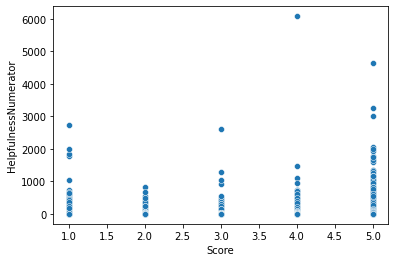

In [8]:
sns.scatterplot(data=df, x="Score", y="HelpfulnessNumerator")

<AxesSubplot:xlabel='Score', ylabel='lenrev'>

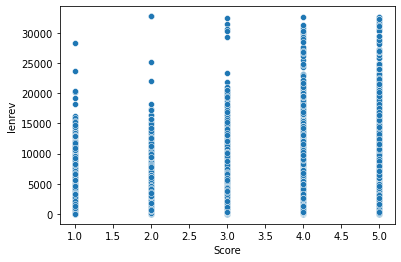

In [9]:
sns.scatterplot(data=df, x="Score", y="lenrev")

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Score'], random_state=0, test_size =1/4.0 )

In [11]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [12]:
naive_bayes = MultinomialNB(alpha=1)
naive_bayes.fit(training_data, y_train)

MultinomialNB(alpha=1)

In [13]:
predictions = naive_bayes.predict(testing_data)

Accuracy score:  0.5997320861217176
RMSE on testing set =  1.1623340565481473


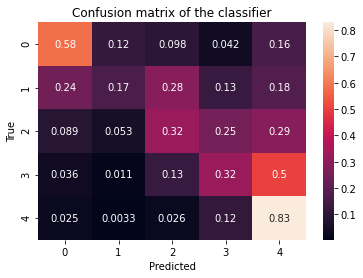

In [14]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print("RMSE on testing set = ", mean_squared_error(y_test, predictions))
# Plot a confusion matrix
cm = confusion_matrix(y_test, predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


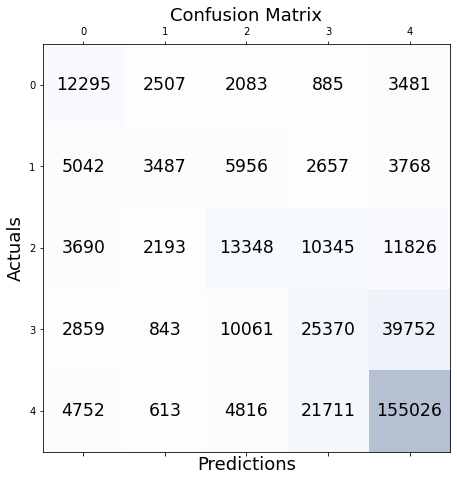

In [15]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predictions)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


# Approach 2 cleaned text


In [16]:
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
stop_words = set(stopwords.words("english"))

In [17]:
final = []
for x in df['Text']:
    y = x.split(' ')
    for z in y :
        if z in stop_words:
            y.remove(z)
        else: 
            pass
    final.append(' '.join(y)) 

In [18]:
df['cleaned'] = final

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned'], df['Score'], random_state=0, test_size =1/4.0 )

In [20]:
count_vector = CountVectorizer()
training_data = count_vector.fit_transform(X_train)
testing_data = count_vector.transform(X_test)

In [21]:
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [22]:
predictions = naive_bayes.predict(testing_data)

Accuracy score:  0.6017815127974674
RMSE on testing set =  1.1311089230205573


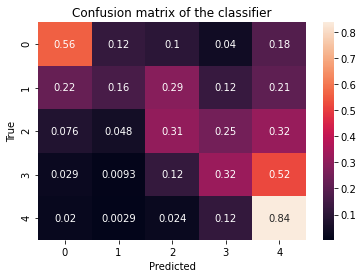

In [23]:
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print("RMSE on testing set = ", mean_squared_error(y_test, predictions))
# Plot a confusion matrix
cm = confusion_matrix(y_test, predictions, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [24]:
X_submission = pd.read_csv('data/X_test.csv')

In [25]:
X_submission.head()

,Id,ProductId,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Time,Summary,Text,Helpfulness,Score
0,5,0005019281,A2L0G56BNOTX6S,0,0,1383696000,Dickens updated.,This has been a favorite movie of mine for a l...,0.000000,NaN
1,11,0005019281,A33EWPXESP9GQH,0,0,1390780800,Good Version,Even though i don't care for Henry Winklers a...,0.000000,NaN
2,17,0005019281,A13KAQO9F5X0FN,0,0,1389657600,the fonz does scrooge,Anorher good movie for holiday watchers..a lit...,0.000000,NaN
3,46,0005019281,A306NASGVUDFKF,10,14,1132963200,A refreshing twist on a Holiday classic,My wife and I grew up in New Hampshire where t...,0.714286,NaN
4,47,0005019281,A38G1NN5SD81GD,0,1,1384905600,Not my favorite,"This is a first for me, I didn't like this mov...",0.000000,NaN


In [26]:

finalop = []
for x in X_submission['Text']:
    y = str(x).split(' ')
    for z in y :
        if z in stop_words:
            y.remove(z)
        else: 
            pass
    finalop.append(' '.join(y))

X_submission['cleaned'] = finalop


In [27]:
X_testing_data = count_vector.transform(X_submission['cleaned'])

In [28]:
X_submission['Score'] = naive_bayes.predict(X_testing_data)

In [29]:
# Create the submission file
submission = X_submission[['Id', 'Score']]
submission.to_csv("data/submission.csv", index=False)
